Max test acc: 0.9943604204050244
Optimal var_dt: 4
Max test accuracy: 0.9943604204050244


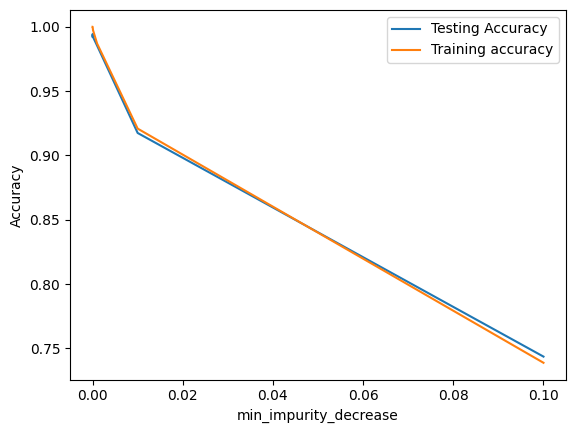

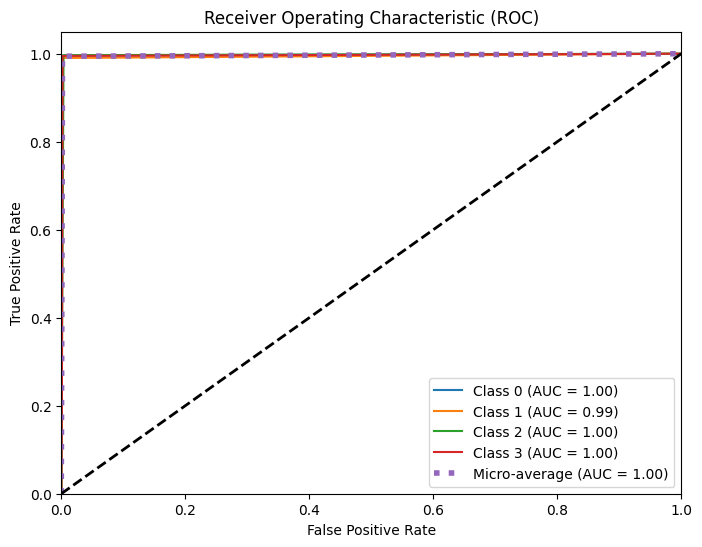

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load data
path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
x = pd.read_csv(path, header=None)

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'
y = pd.read_csv(path, header=None)
y = pd.Series.ravel(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

# Train Decision Tree model and evaluate accuracy
var_dt = [10.0 ** i for i in np.arange(-1, -100, -1)]
train_accuracy = np.empty(len(var_dt))
test_accuracy = np.empty(len(var_dt))
for i, k in enumerate(var_dt):
    # Setup a Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42, min_impurity_decrease=k)
    dt = model.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = dt.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = dt.score(X_test, y_test)

print(f"Max test acc: {np.max(test_accuracy)}")

# Plotting accuracy vs var_dt
plt.plot(var_dt, test_accuracy, label='Testing Accuracy')
plt.plot(var_dt, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('min_impurity_decrease')
plt.ylabel('Accuracy')
print(f"Optimal var_dt: {np.argmax(test_accuracy)}")
print(f"Max test accuracy: {max(test_accuracy)}")

# Convert labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute probability scores for each class
dt = DecisionTreeClassifier(random_state=42, min_impurity_decrease=var_dt[np.argmax(test_accuracy)])
dt.fit(X_train, y_train)
y_prob = dt.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute ROC curve and AUC for micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data uji
y_pred = dt.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Menghitung presisi (menggunakan metode macro)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Menghitung recall (menggunakan metode macro)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

# Menghitung F1-score (menggunakan metode macro)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ", f1)

Accuracy:  0.9943604204050244
Precision:  0.9941995319693391
Recall:  0.9944599209778539
F1-score:  0.9943220174466411
